In [1]:
import functools
import time

import jax
import jax.numpy as jnp
import jax.random
import diffrax
import numpy as np
import matplotlib.pyplot as plt

import orc.data

jax.config.update("jax_enable_x64", True)

In [2]:
def plot_time_series(U,t, labels=None, t_lim = None, figsize = (20,8), **kwargs):
    '''
    Plots time series data with separate panels for each state variable.

    INPUTS:
        U: 2D array of shape (Nu, Nt) where Nu is the number of state variables and Nt is the number of time points
        t: 1D array of time points
        labels: list of strings containing the names of the state variables
        t_lim: limit for the x-axis
        **kwargs: additional arguments to pass to plot
    '''
    if t_lim is None:
        t_lim = t[-1]
    kwargs.setdefault('linewidth', 2)
    fig, axs = plt.subplots(U.shape[0], figsize = figsize)
    for i in range(U.shape[0]):
        axs[i].plot(t, U[i,:], **kwargs)
        axs[i].set_xlim([0,t_lim])
        if labels is not None:
            axs[i].set(ylabel=labels[i])
    axs[-1].set(xlabel=r't')
    plt.show()

def imshow_1D_spatiotemp(U, TN, domain=(0,1), figsize=(20, 6), title = None, **kwargs):
    '''
    Plot 1D spatiotemporal data using imshow. 
    Author: Dima Tretiak

    INPUTS:
        U: 2D array of shape (Nx, NT) where Nx is the number of spatial points and NT is the number of time points
        TN: final time
        domain: tuple of length 2 containing the bounds of the spatial domain
        title: string containing the title of the plot, if None no title is shown
        **kwargs: additional arguments to pass to imshow
    '''

    #set defaults for imshow
    kwargs.setdefault('aspect', 'auto')
    kwargs.setdefault('origin', 'lower')
    kwargs.setdefault('cmap', 'RdGy')
    kwargs.setdefault('extent', [0, TN, domain[0], domain[1]])

    plt.figure(figsize=figsize, dpi=300)
    plt.imshow(U, **kwargs)
    plt.ylabel('x')
    plt.xlabel('t')
    if title is not None:
        plt.title(title)
    plt.colorbar(pad = 0.01, label = r'$u$')
    plt.show()
    
# TODO: Plot attractor, imshow 1d spatiotemp, edit above to use U list 

# integrators 

In [5]:
y,t = orc.data.lorenz63(tN = 20, dt = 0.01)
plot_time_series(y.T, t.T)

NameError: name 'plot_time_series' is not defined

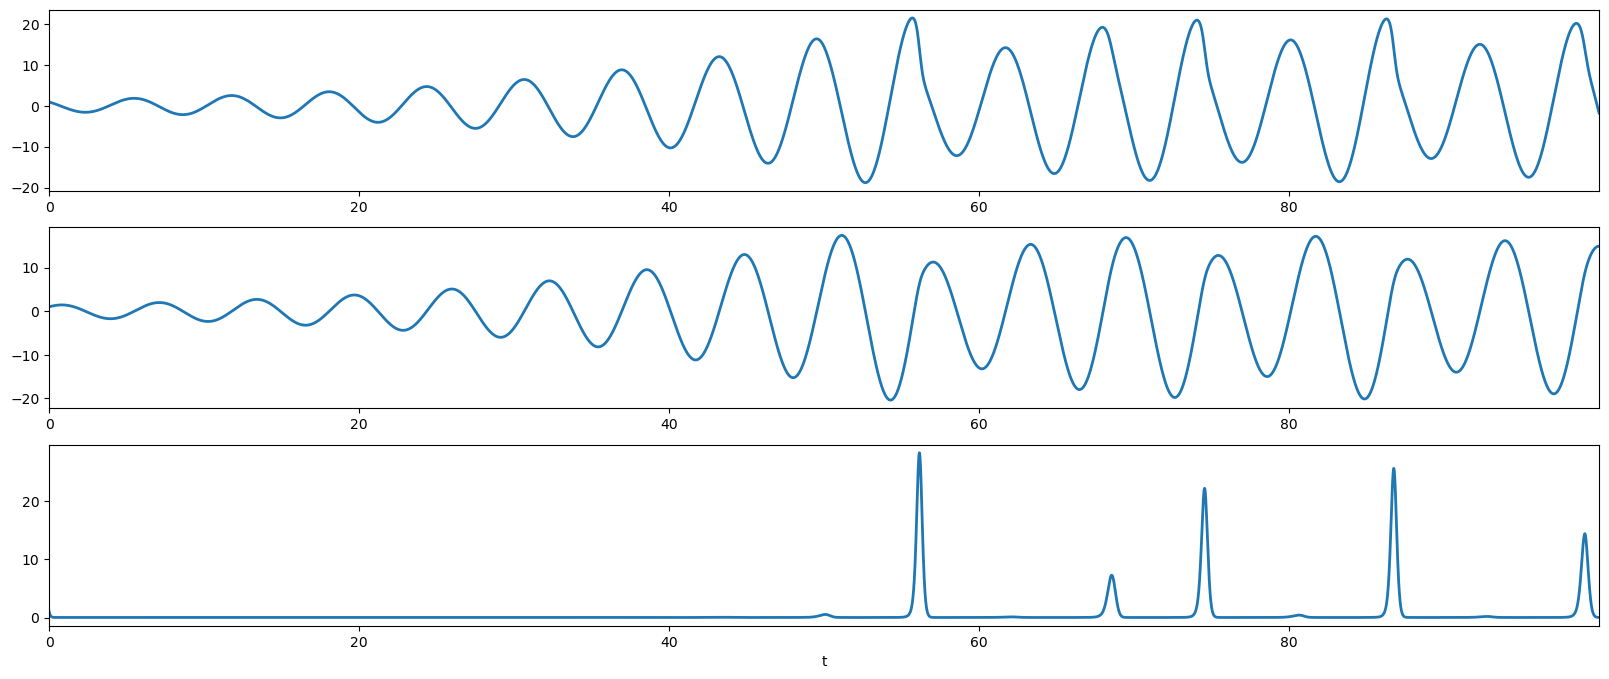

In [ ]:
y,t = orc.data.rossler(tN = 100, dt = 0.01)
plot_time_series(y.T, t.T)

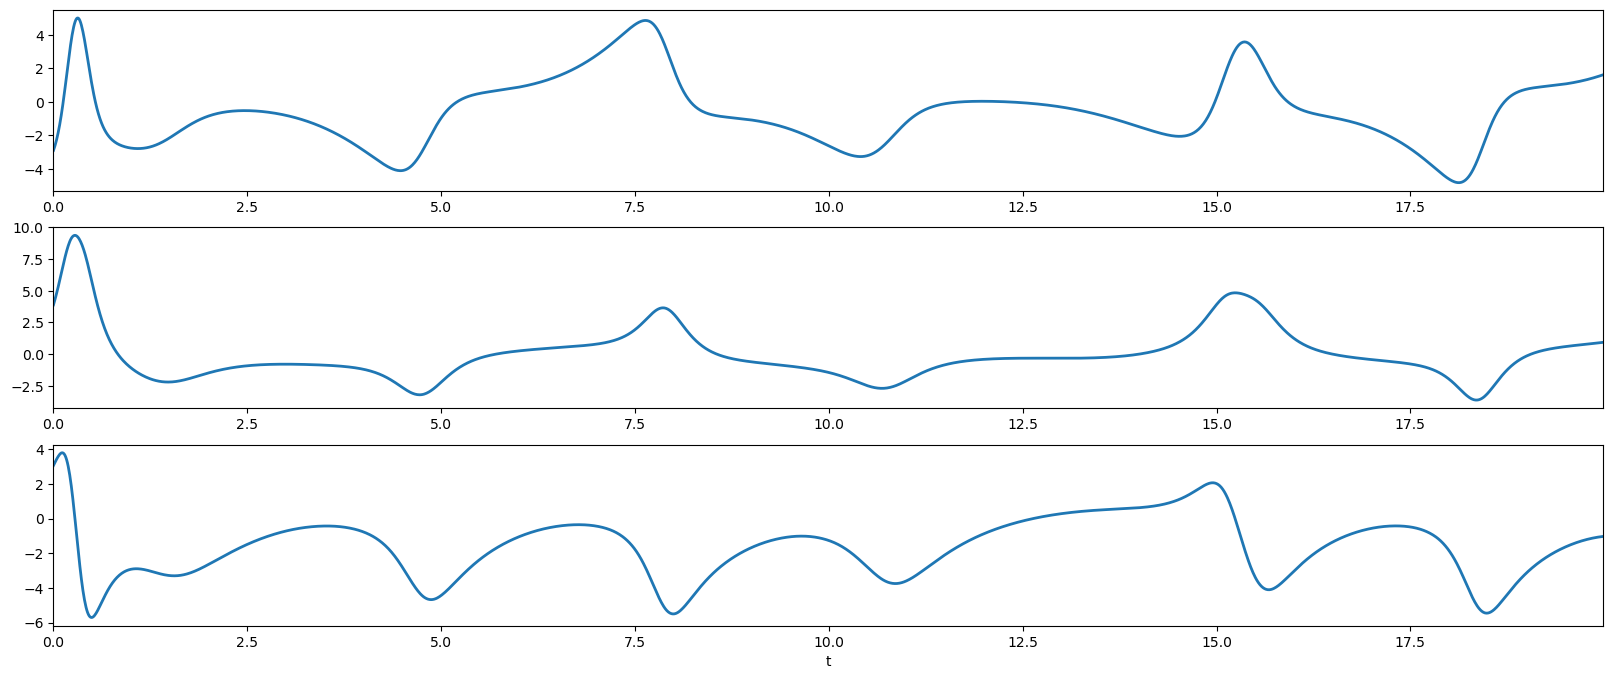

In [ ]:
y,t = orc.data.sakaraya(tN = 20, dt = 0.01)
plot_time_series(y.T, t.T)

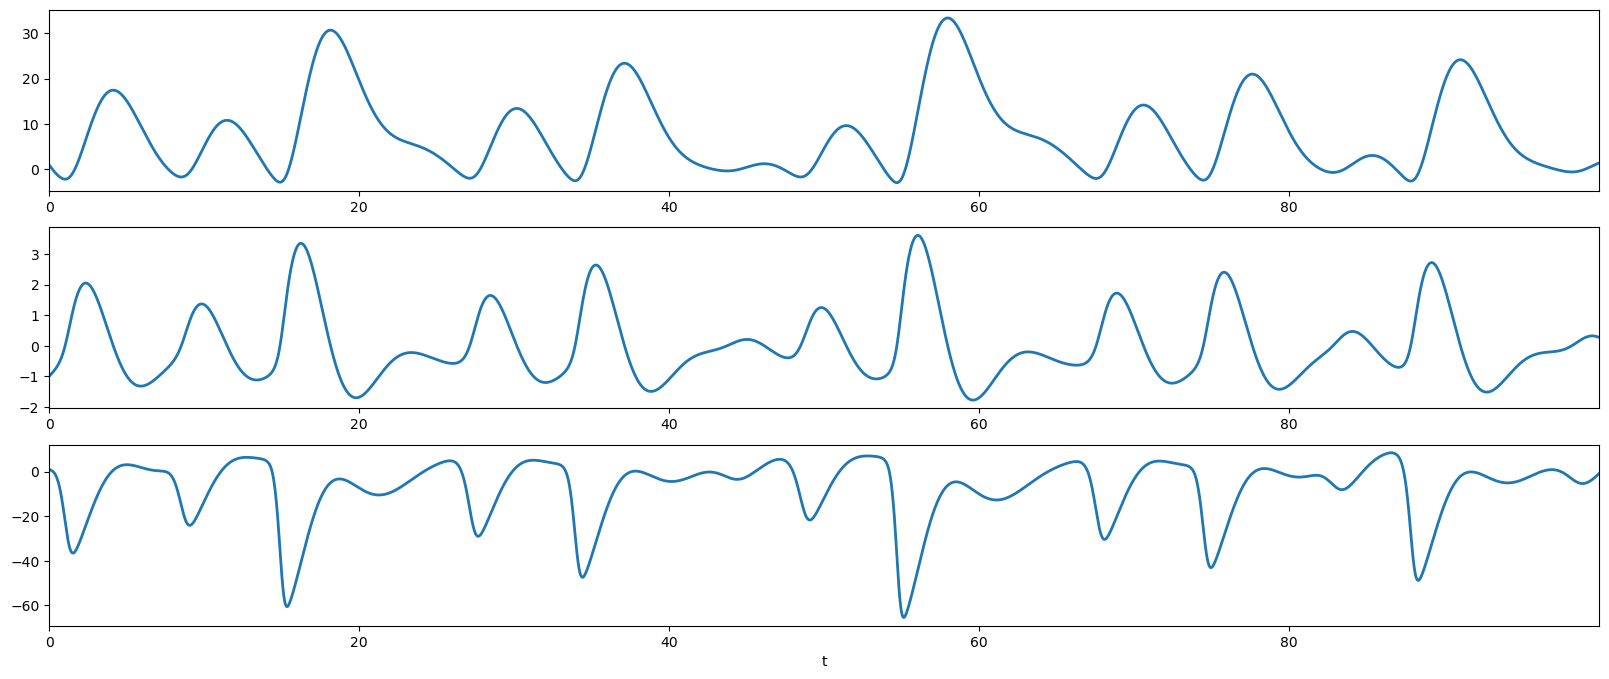

In [ ]:
y,t = orc.data.colpitts(tN = 100, dt = 0.01)
plot_time_series(y.T, t.T)

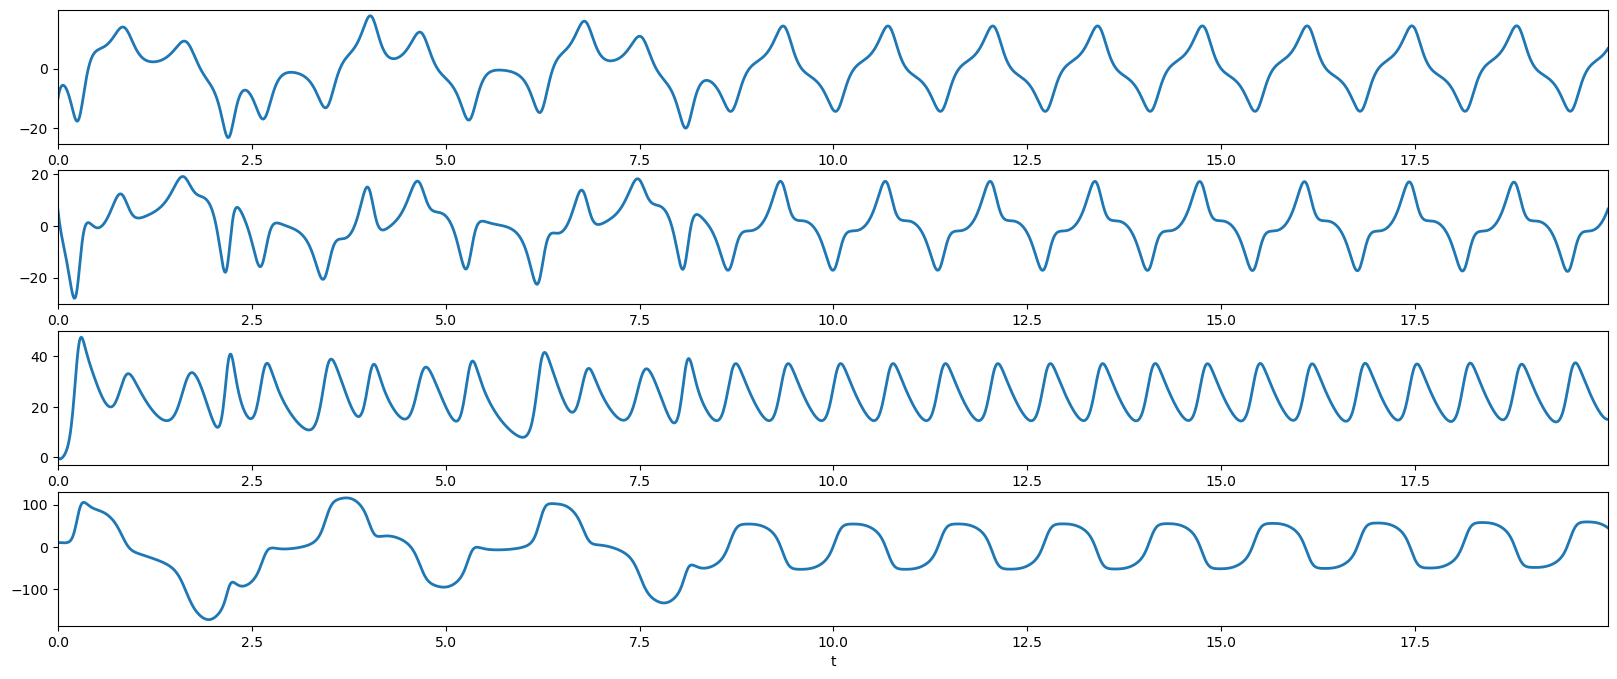

In [ ]:
y,t = orc.data.hyper_lorenz63(tN = 20, dt = 0.01)
plot_time_series(y.T, t.T)

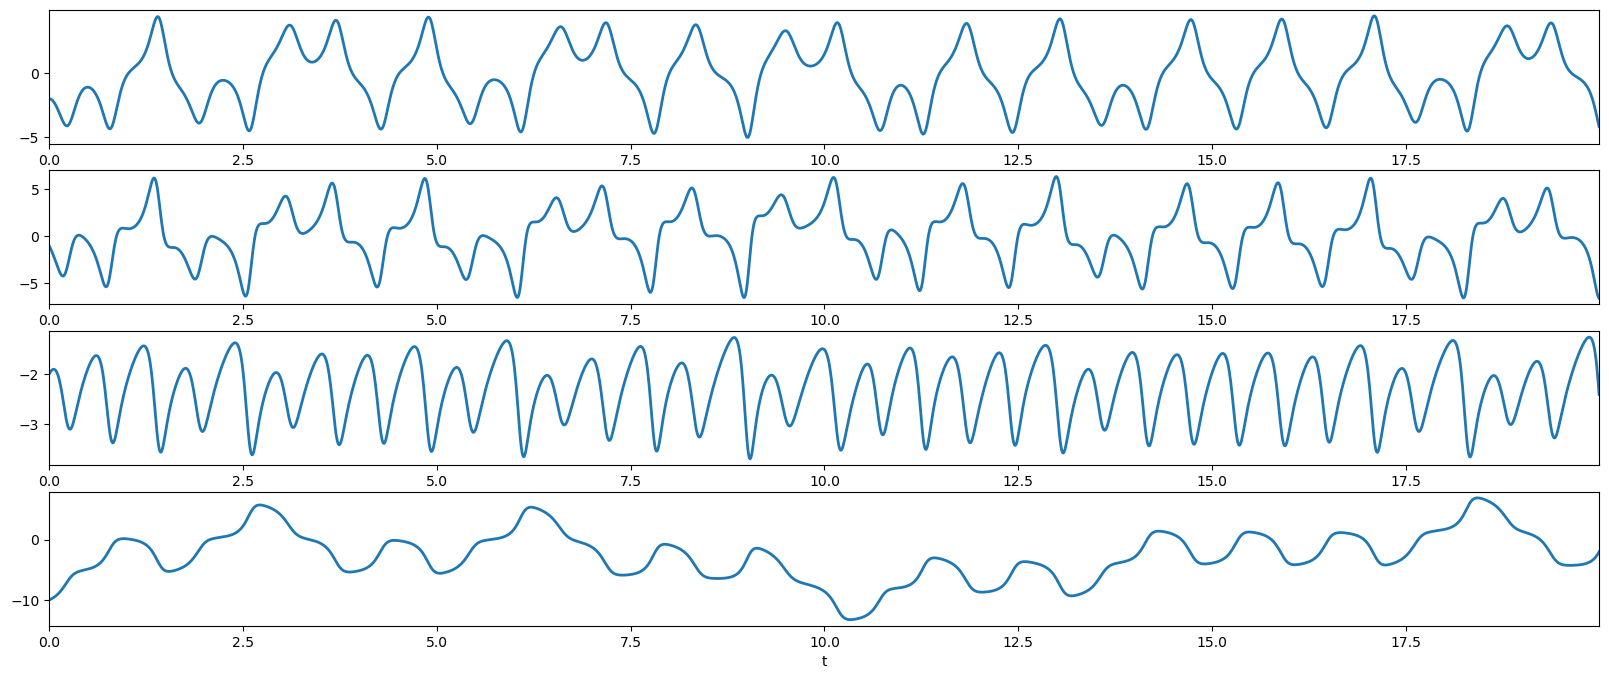

In [ ]:
y,t = orc.data.hyper_xu(tN = 20, dt = 0.01)
plot_time_series(y.T, t.T)

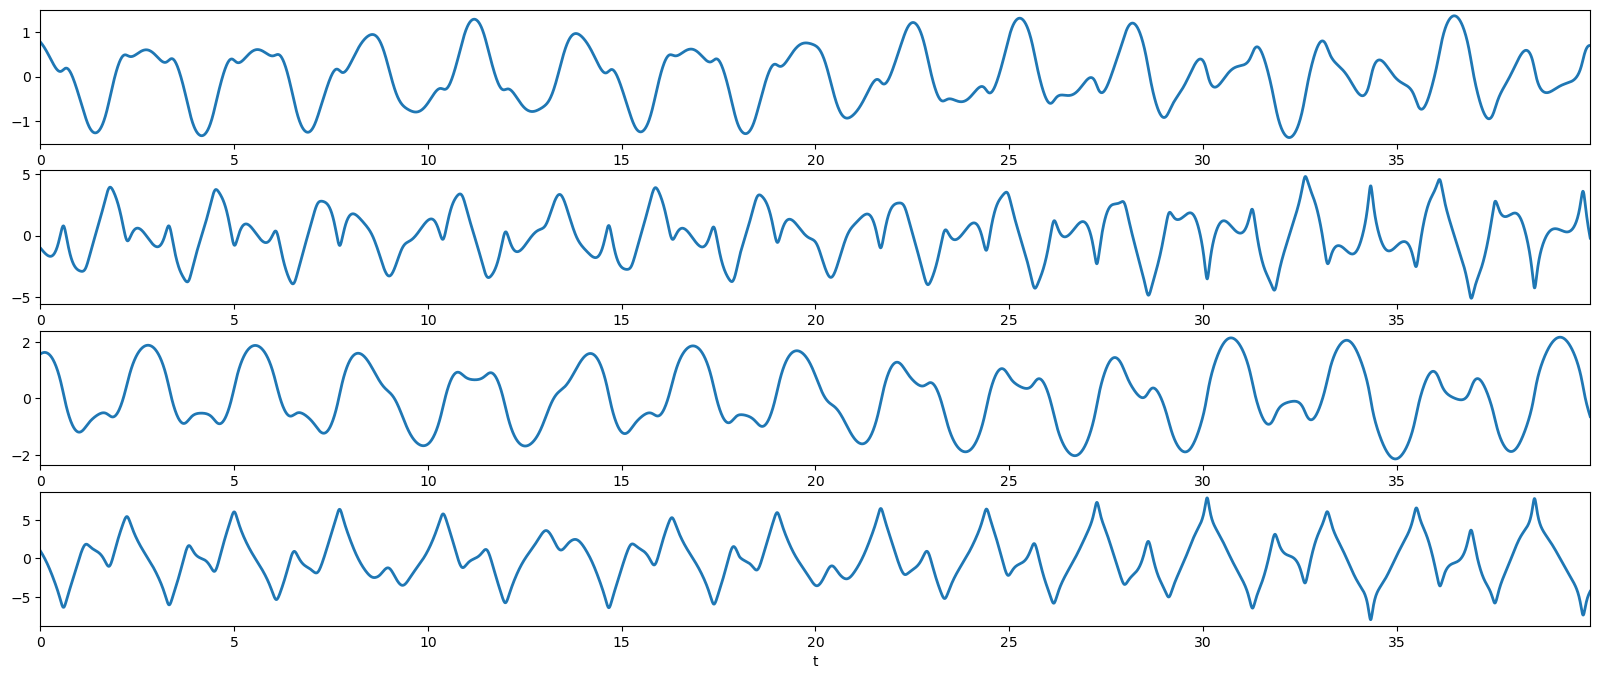

In [ ]:
y,t = orc.data.double_pendulum(tN = 40, dt = 0.01, damping=0.0)
plot_time_series(y.T, t.T)

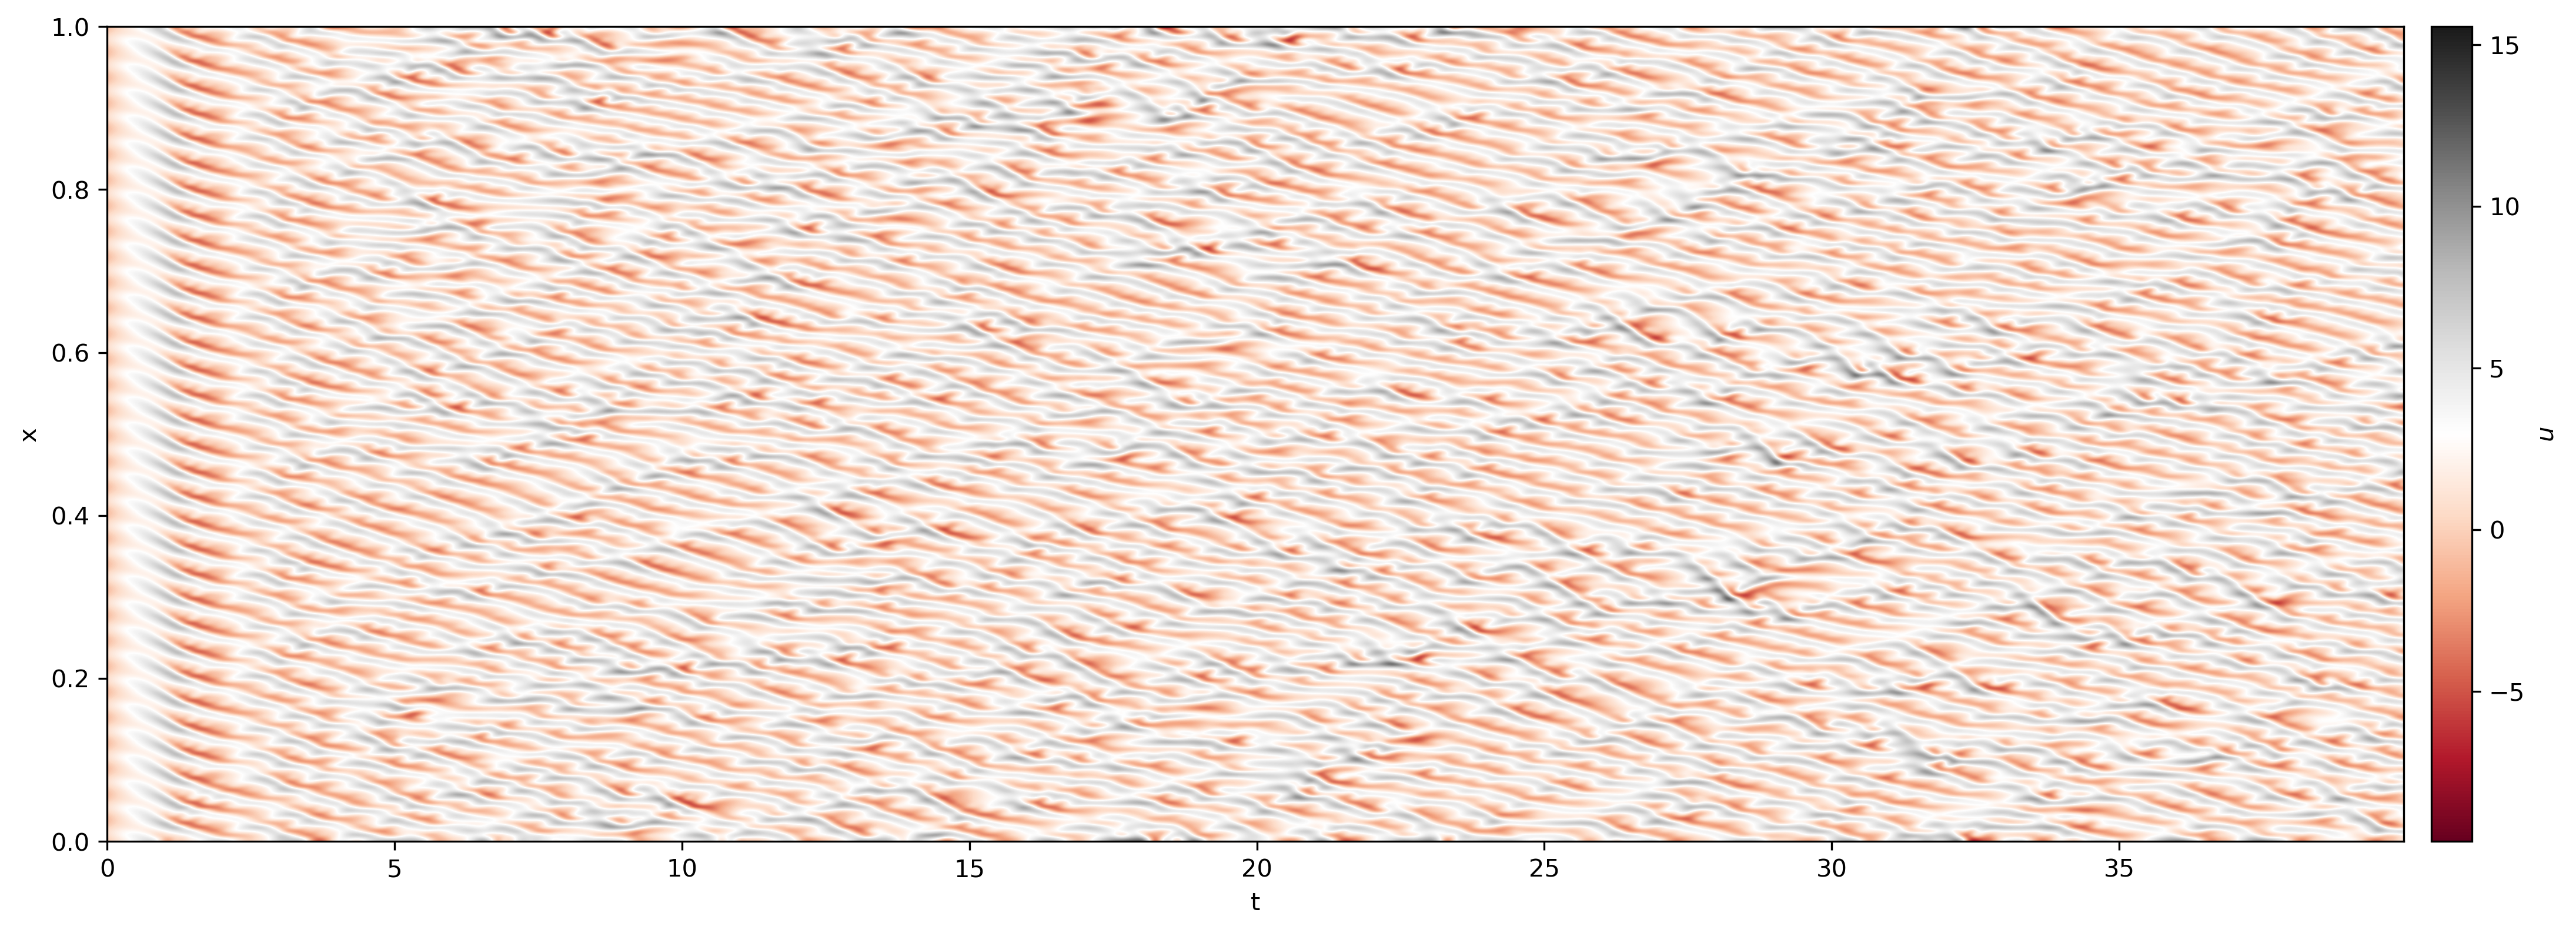

In [ ]:
y,t = orc.data.lorenz96(tN = 40, dt = 0.05, N=200)
imshow_1D_spatiotemp(y.T, t[-1], interpolation = 'bicubic')

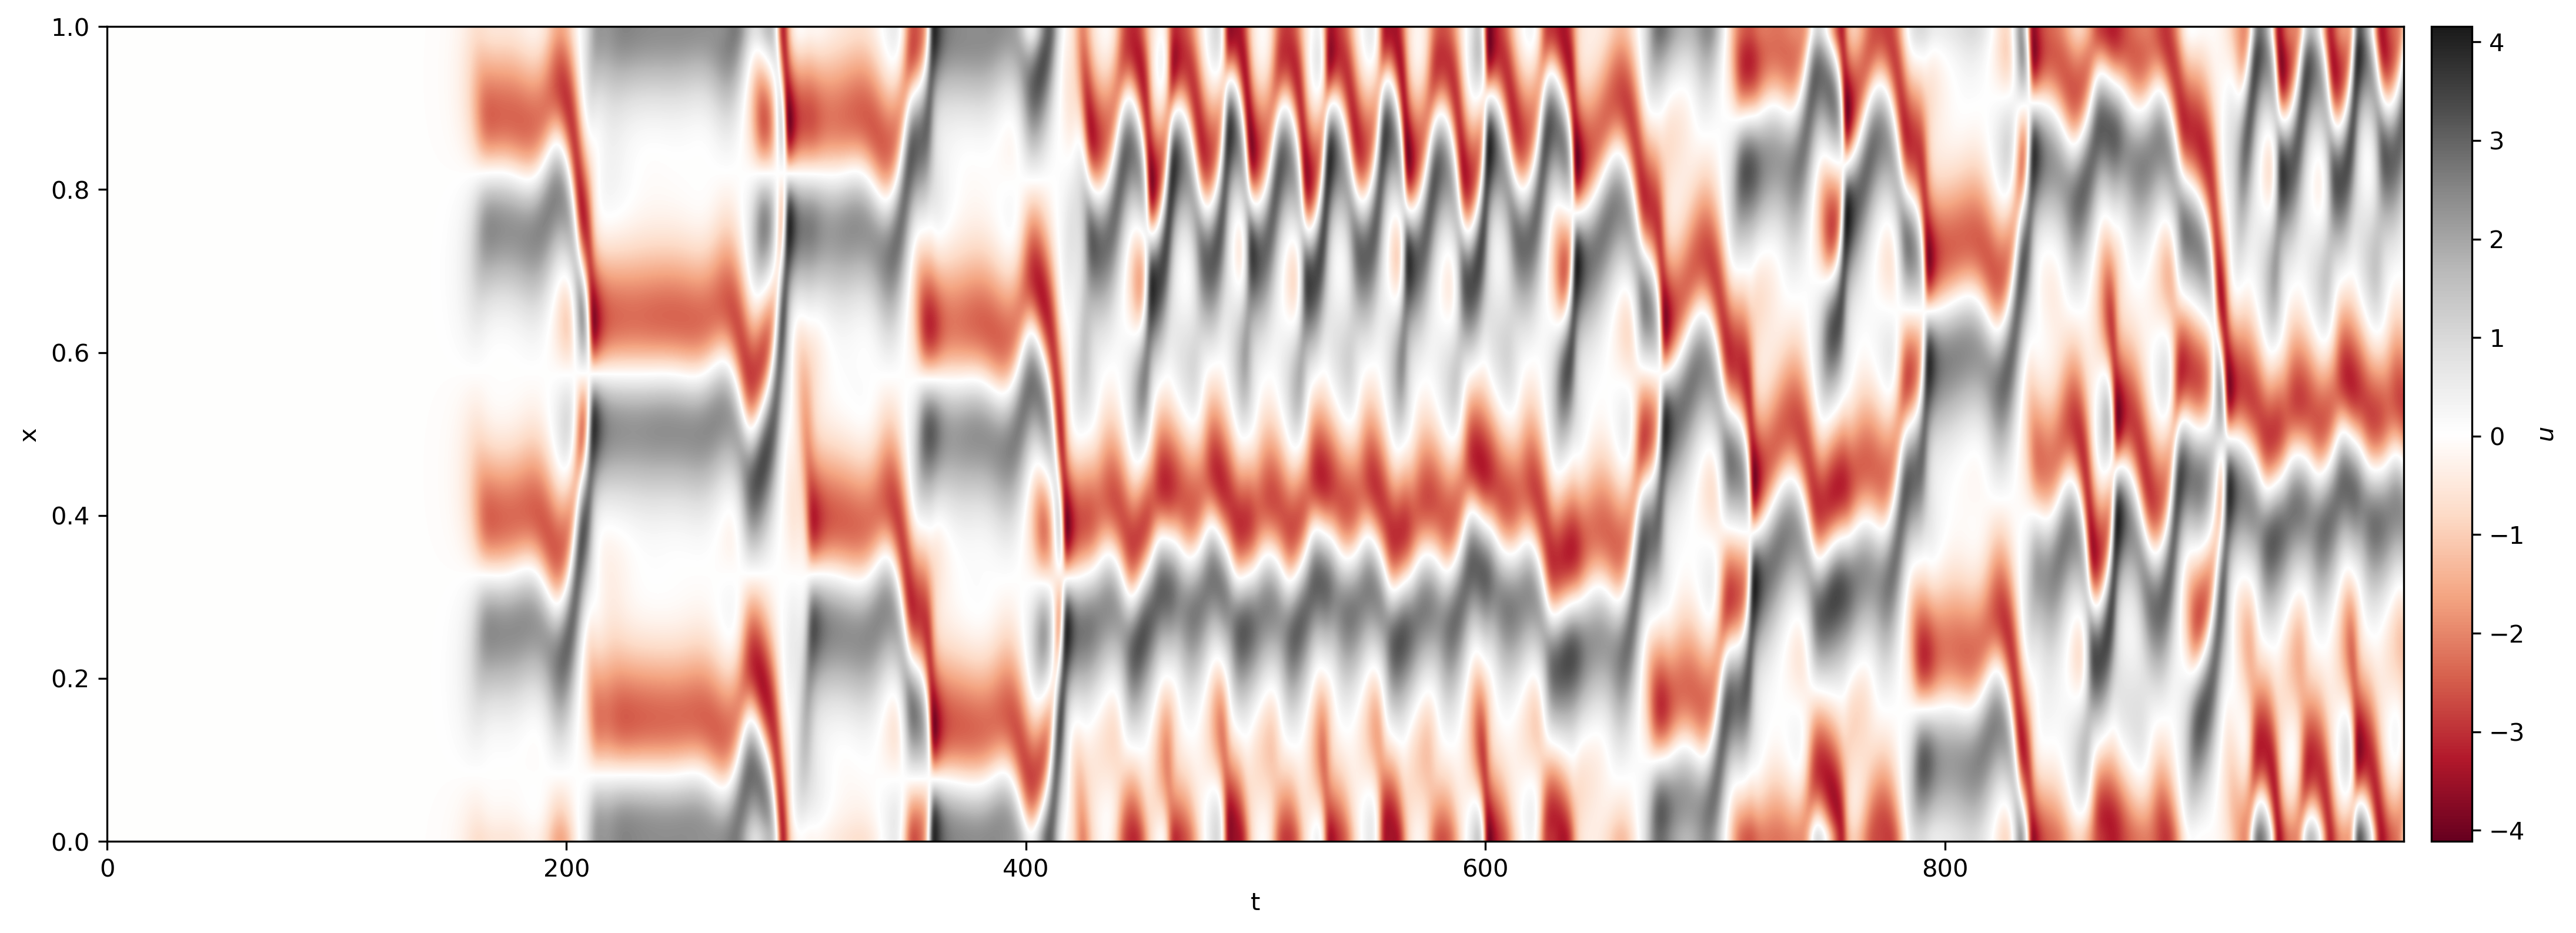

In [ ]:
y,t = orc.data.KS_1D(tN=1000)
imshow_1D_spatiotemp(y.T, t[-1], interpolation = 'bicubic')